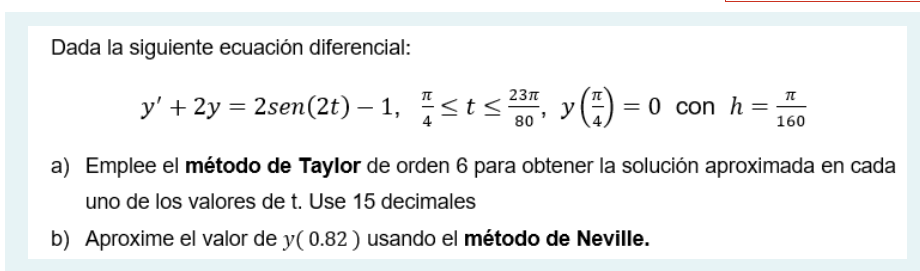

Saco las derivadas implícitas
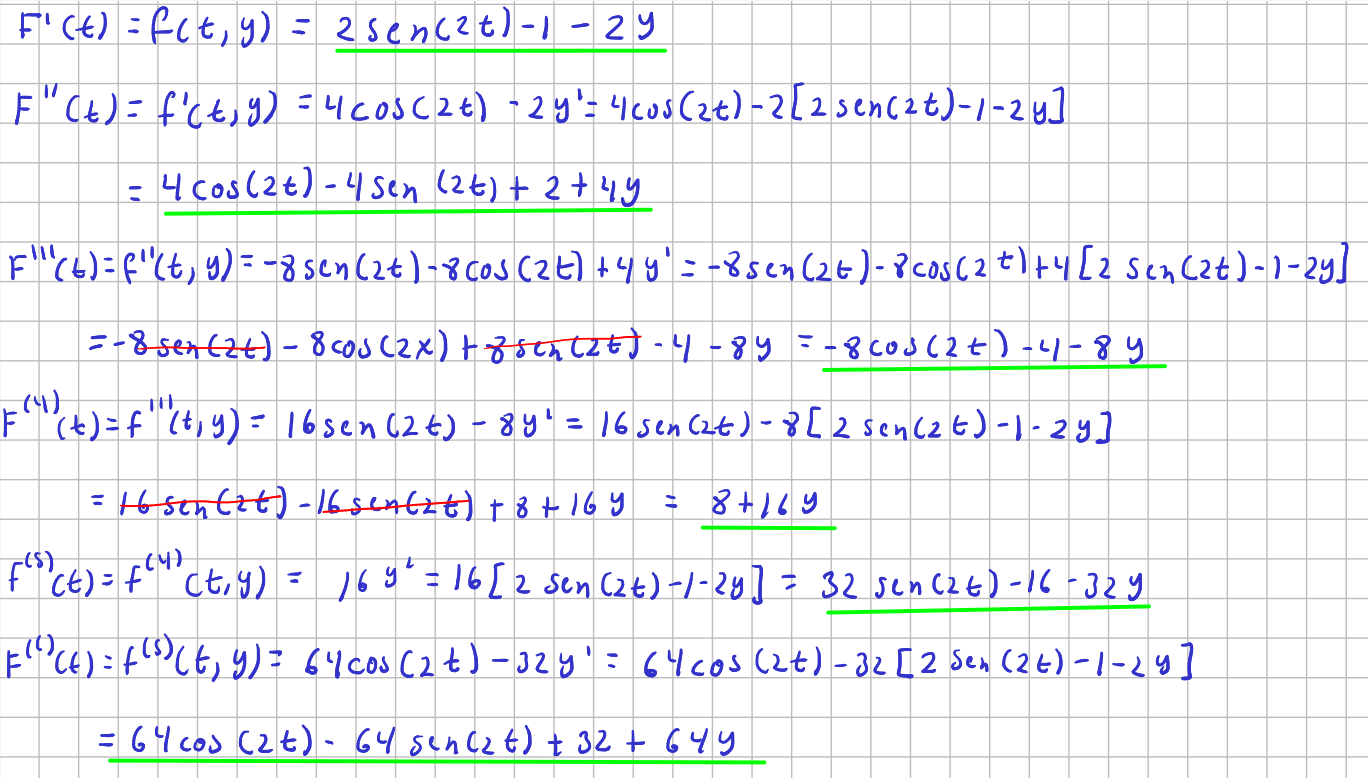

Resuelvo el Python

In [3]:
from sympy import *


fy = symbols("fy", cls=Function)
t, y = symbols("t y")

h= pi/160

# Declaro mi ecuación
eq = Eq(fy(t).diff(), 2*sin(2*t) -1 - 2*fy(t))
f = 2*sin(2*t) - 1 - 2*y

# Calculamos la solucion particular F, si nos da una expresión
# con números complejos, es que esta EDI no tiene solución simbólica en los reales
condiciones_iniciales = {fy(pi/4):0}
F = dsolve(eq, ics=condiciones_iniciales)
F

Eq(fy(t), sin(2*t)/2 - cos(2*t)/2 - 1/2)

In [5]:
from numpy import arange

# creo mi intervalo
T = [t for t in arange(start=pi/4, stop=(((23*pi)/80) + h/2), step=h)]
T

[pi/4, 41*pi/160, 21*pi/80, 43*pi/160, 11*pi/40, 9*pi/32, 23*pi/80]

In [7]:
# Asigno variables a las derivadas
d1f = 4*cos(2*t)-4*sin(2*t) + 2 + 4*y
d2f = -8*cos(2*t)-4-8*y
d3f = 8+16*y
d4f = 32*sin(2*t)-16-32*y
d5f = 64*cos(2*t)-64*sin(2*t)+32+64*y

# valor que me da la condición inicial, en este caso 0
Y = [0]

# Este bucle for calcula lo Y, para uno de orden menor solo abria que quitar las
# líneas correspondientes, para uno de grado mayor agregarlo.
for i in range(len(T)-1):
    Y.append(
        Y[i] + 
        float(h*f.subs({t: T[i],y: Y[i]})) + 
        float(((h**2)/factorial(2)) * d1f.subs({t: T[i],y: Y[i]}))+
        float(((h**3)/factorial(3)) * d2f.subs({t: T[i],y: Y[i]})) +
        float(((h**4)/factorial(4)) * d3f.subs({t: T[i],y: Y[i]})) +
        float(((h**5)/factorial(5)) * d4f.subs({t: T[i],y: Y[i]})) +
        float(((h**6)/factorial(6)) * d5f.subs({t: T[i],y: Y[i]})) 
    )

Y

[0,
 0.01924442599990999,
 0.03768821473051377,
 0.05530292720642128,
 0.07206140281773453,
 0.08793780120973944,
 0.10290764212685992]

In [8]:
# calculamos los valores exactos
solucion_exacta = []
for i in range(len(T)):
    solucion_exacta.append(float(F.rhs.subs({t: T[i]})))
solucion_exacta

[0.0,
 0.019244425999895773,
 0.03768821473048646,
 0.05530292720638197,
 0.07206140281768429,
 0.08793780120967935,
 0.102907642126791]

In [9]:
# Desplegamos los valores obtenidos
from utils import imprimir_tabla

lista_tabla = [["t_i", "y(t_t)i Aprox", "F(t_i)Exacta", "error", ]]

for i in range(len(T)):
    lista_tabla.append(
        [
            str(T[i]),
            str(Y[i]),
            str(solucion_exacta[i]),
            str(abs(Y[i] - solucion_exacta[i])),
        ]
    )

print("A continuación tenemos los valores de cada t")
imprimir_tabla(lista_tabla)

A continuación tenemos los valores de cada t


┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ t_i       ┃ y(t_t)i Aprox       ┃ F(t_i)Exacta         ┃ error                  ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ pi/4      │ 0                   │ 0.0                  │ 0.0                    │
│ 41*pi/160 │ 0.01924442599990999 │ 0.019244425999895773 │ 1.421779360910591e-14  │
│ 21*pi/80  │ 0.03768821473051377 │ 0.03768821473048646  │ 2.731148640577885e-14  │
│ 43*pi/160 │ 0.05530292720642128 │ 0.05530292720638197  │ 3.930883396563445e-14  │
│ 11*pi/40  │ 0.07206140281773453 │ 0.07206140281768429  │ 5.0237591864288333e-14 │
│ 9*pi/32   │ 0.08793780120973944 │ 0.08793780120967935  │ 6.00908212078366e-14   │
│ 23*pi/80  │ 0.10290764212685992 │ 0.102907642126791    │ 6.891709425360659e-14  │
└───────────┴─────────────────────┴──────────────────────┴────────────────────────┘

In [11]:
# Calculo el valor en y(0.82) con interpolacion de Neville

from metodos_interpolacion import neville

matriz = neville(T, Y, 0.82)

lista_para_tabular = [["Qx0", "Qx1", "Qx2", "Qx3", "Qx4", "Qx5", "Qx6"]]
for fila in matriz:
    nueva_fila = []
    for celda in fila:
        nueva_fila.append(str(celda))
    lista_para_tabular.append(nueva_fila)

imprimir_tabla(lista_para_tabular)

┏━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Qx0           ┃ Qx1           ┃ Qx2           ┃ Qx3           ┃ Qx4            ┃ Qx5           ┃ Qx6            ┃
┡━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ 0.0           │ 0.0           │ 0.0           │ 0.0           │ 0.0            │ 0.0           │ 0.0            │
│ 0.01924442599 │ 0.03391362572 │ 0.0           │ 0.0           │ 0.0            │ 0.0           │ 0.0            │
│ 990999        │ 472987        │               │               │                │               │                │
│ 0.03768821473 │ 0.03330333430 │ 0.03337588054 │ 0.0           │ 0.0            │ 0.0           │ 0.0            │
│ 051377        │ 784693        │ 34686         │               │                │               │                │
│ 0.05530292720 │ 0.03350044132 │ 0.03337845741 │ 0.03337739424 │ 0.0            │ 0.0           │ 0.0            │
│ 642128        │ 805878        │ 7433824       │ 8254165       │                │               │                │
│ 0.07206140281 │ 0.03456024245 │ 0.03337446121 │ 0.03337744203 │ 0.033377415303 │ 0.0           │ 0.0            │
│ 773453        │ 5917156       │ 3958          │ 931997        │ 29005          │               │                │
│ 0.08793780120 │ 0.03653410451 │ 0.03333867554 │ 0.03337729714 │ 0.033377414427 │ 0.03337741499 │ 0.0            │
│ 973944        │ 9506845       │ 6263914       │ 381995        │ 415264         │ 458679        │                │
│ 0.10290764212 │ 0.03946930457 │ 0.03324999292 │ 0.03337526430 │ 0.033377417966 │ 0.03337741496 │ 0.033377414986 │
│ 685992        │ 688894        │ 729261        │ 789184        │ 91369          │ 701677        │ 48922          │
└───────────────┴───────────────┴───────────────┴───────────────┴────────────────┴───────────────┴────────────────┘

In [12]:
print("El valor aproximado e interpolado de y(0.82) es 0.03337741498648922")

El valor aproximado e interpolado de y(0.82) es 0.03337741498648922
